In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
import datetime
from API_Keys import weather_api_key

In [2]:
# Use the citipy library to find a city close to the random co-ordinates generated
from citipy import citipy

# List for holding co-ords and cities
lat_lng = []

# Create a set of random lat and lng combinations - 1000 sample size
latitudes = np.random.uniform(low=-35.000, high=60.000, size=1000)
longitudes = np.random.uniform(low=-180.000, high=180.000, size=1000)

# Now join the random coordinates together and process to get a list of cities
lat_lng = zip(latitudes, longitudes)



In [3]:
# Use citipy library to get a city name that corresponds to the lat,lng co-ords
# There will be some duplicates so only add a city once
cities = []

for coord in lat_lng:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    # Only add if we don't already have that city
    if city not in cities:
        cities.append(city)
cities


['hithadhoo',
 'avarua',
 'fort abbas',
 'arys',
 'palasbari',
 'kapaa',
 'butaritari',
 'andevoranto',
 'mlyniv',
 'kudahuvadhoo',
 'rudsar',
 'boma',
 'mahebourg',
 'voh',
 'arraial do cabo',
 'aguimes',
 'renigunta',
 'lampa',
 'novosokolniki',
 'rockport',
 'sentyabrskiy',
 'lincoln',
 'rikitea',
 'miri',
 'warri',
 'gazli',
 'quatre cocos',
 'broome',
 'lagoa',
 'santa maria',
 'pacific grove',
 'nieuw amsterdam',
 'georgetown',
 'taolanaro',
 'satitoa',
 'jamestown',
 'lishui',
 'bethel',
 'kalmunai',
 'zaranj',
 'surubim',
 'waingapu',
 'cabo san lucas',
 'padang',
 'bubaque',
 'beloha',
 'skibbereen',
 'provideniya',
 'kavaratti',
 'hilo',
 'obsharovka',
 'culaman',
 'bundaberg',
 'metsavan',
 'tigil',
 'nador',
 'hays',
 'alofi',
 'kloulklubed',
 'meulaboh',
 'nabire',
 'puerto ayora',
 'daru',
 'rawannawi',
 'kodiak',
 'civitanova marche',
 'samusu',
 'peringat',
 'carnarvon',
 'malanje',
 'mecca',
 'san patricio',
 'doctor pedro p. pena',
 'joshimath',
 'magdalena',
 'hillsb

In [5]:
# Now create a dataframe from the lists - faster than directly appending to a dataframe
# for each city
df_weather = pd.DataFrame({
    "City": city_list,
    "Cloudiness": clouds_list,
    "Country": country_list,
    "Date": dt_list,
    "Humidity": humidity_list,
    "Latitude": lat_list,
    "Longitude": lon_list,
    "Max Temp": temp_max_list,
    "Wind Speed": wind_speed_list
})

In [6]:
df_weather

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Hithadhoo,75,MV,1624162703,69,-0.6000,73.0833,28.71,5.72
1,Avarua,40,CK,1624162697,69,-21.2078,-159.7750,24.03,6.69
2,Fort Abbas,0,PK,1624163005,37,29.1925,72.8536,36.26,5.46
3,Arys,40,KZ,1624163005,22,42.4252,68.7950,25.12,9.34
4,Palāsbāri,75,IN,1624163005,78,26.1361,91.5486,32.48,0.00
...,...,...,...,...,...,...,...,...,...
542,Maţāy,0,EG,1624163141,27,28.4190,30.7792,25.16,2.12
543,Kaeo,18,NZ,1624162701,88,-35.1000,173.7833,16.29,7.36
544,Mount Isa,3,AU,1624163141,23,-20.7333,139.5000,20.87,2.57
545,Mushie,60,CD,1624163141,58,-3.0167,16.9000,21.56,1.12


In [4]:
city_list = []
clouds_list = []
country_list = []
dt_list = []
humidity_list = []
lat_list = []
lon_list = []
temp_max_list = []
wind_speed_list = []
counter = 0

weatherurl = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

for city in cities:
    counter += 1
    try:
        wpi_resp = requests.get(weatherurl + city).json()
        print(counter, city, wpi_resp['sys']["country"], wpi_resp["id"], ' processed')
        city_list.append(wpi_resp["name"])
        clouds_list.append(wpi_resp["clouds"]["all"])
        country_list.append(wpi_resp["sys"]["country"])
        dt_list.append(wpi_resp["dt"])
        humidity_list.append(wpi_resp["main"]["humidity"])
        lat_list.append(wpi_resp["coord"]["lat"])
        lon_list.append(wpi_resp["coord"]["lon"])
        temp_max_list.append(wpi_resp['main']['temp_max'])
        wind_speed_list.append(wpi_resp["wind"]["speed"])
    except Exception as e:
        print(counter, " Error ", city, " does not exist in database")

1 hithadhoo MV 1282256  processed
2 avarua CK 4035715  processed
3 fort abbas PK 1179223  processed
4 arys KZ 1526168  processed
5 palasbari IN 1260769  processed
6 kapaa US 5848280  processed
7 butaritari KI 2110227  processed
8  Error  andevoranto  does not exist in database
9 mlyniv UA 700964  processed
10 kudahuvadhoo MV 1337607  processed
11 rudsar IR 118191  processed
12 boma GH 2303258  processed
13 mahebourg MU 934322  processed
14 voh NC 2137748  processed
15 arraial do cabo BR 3471451  processed
16 aguimes ES 2522325  processed
17 renigunta IN 1258213  processed
18 lampa CL 3885273  processed
19 novosokolniki RU 517921  processed
20 rockport US 4723422  processed
21  Error  sentyabrskiy  does not exist in database
22 lincoln US 5072006  processed
23 rikitea PF 4030556  processed
24 miri MY 1738050  processed
25 warri NG 2319133  processed
26 gazli UZ 1513990  processed
27 quatre cocos MU 1106643  processed
28 broome US 5110365  processed
29 lagoa PT 3372964  processed
30 sant

231 zabaykalsk RU 2012780  processed
232 nevers FR 2990473  processed
233 vostok RU 2013279  processed
234 esmeraldas BR 3464008  processed
235 barao de melgaco BR 3470871  processed
236 souillac MU 933995  processed
237 planaltina BR 3453420  processed
238 kango GA 2400682  processed
239 tulagi SB 2102384  processed
240  Error  burica  does not exist in database
241 chapais CA 5919850  processed
242 pangkalanbuun ID 1632694  processed
243 santa catalina PH 1688363  processed
244 serov RU 1492663  processed
245 ponta delgada PT 3372783  processed
246 teguldet RU 1489822  processed
247 tura IN 1254046  processed
248 krutinka RU 1501690  processed
249 banjar ID 1650232  processed
250 gizo SB 2108857  processed
251 lebork PL 3093739  processed
252 mamlyutka KZ 1521153  processed
253 la ronge CA 6050066  processed
254 hami CN 1529484  processed
255 roznava SK 723713  processed
256 saint-philippe RE 935215  processed
257 birin NP 1283334  processed
258 lebanon US 4636045  processed
259 taba

460 kieta PG 2094027  processed
461  Error  tokzar  does not exist in database
462 iracoubo GF 3381428  processed
463 fayaoue NC 2141305  processed
464 prince rupert CA 6113406  processed
465 marienburg PL 3092472  processed
466 oudtshoorn ZA 967106  processed
467 rize TR 740481  processed
468 kuzino RU 537893  processed
469 wuchang CN 2034141  processed
470 lucea JM 3489657  processed
471 kununurra AU 2068110  processed
472  Error  louisbourg  does not exist in database
473 korla CN 1529376  processed
474 villaviciosa ES 3104707  processed
475 nemuro JP 2128975  processed
476 pandharpur IN 1260546  processed
477  Error  zhaocheng  does not exist in database
478 gushikawa JP 1863495  processed
479 xichang CN 1789647  processed
480 oriximina BR 3393471  processed
481 antalaha MG 1071296  processed
482 jiangkou CN 1806327  processed
483  Error  uwayl  does not exist in database
484  Error  ngukurr  does not exist in database
485 boguchany RU 1509844  processed
486 imphal IN 1269771  proc

In [7]:
# Save city data into a csv file
df_weather.to_csv("cities.csv", index=False)

In [8]:
#routine to do scatter plot 

def do_scatter_plot(x_axis, y_axis, x_title, y_title, plot_color, save_name, rep_date):
    plt.clf()
    plt.scatter(x_axis, y_axis, color=plot_color)
    plot_title = x_title + " vs " + y_title + " as at " + rep_date
    plt.title(plot_title)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.grid(linestyle='-', linewidth=1, alpha=0.5)
    plt.savefig(save_name)
    plt.show()

latest_date = datetime.date.fromtimestamp(max(df_weather['Date'])).strftime("%c")  

latest_date

'Sun Jun 20 00:00:00 2021'

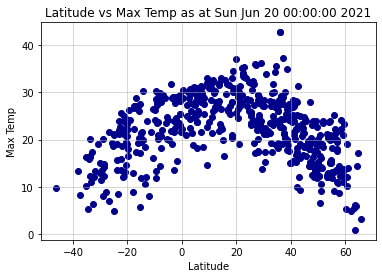

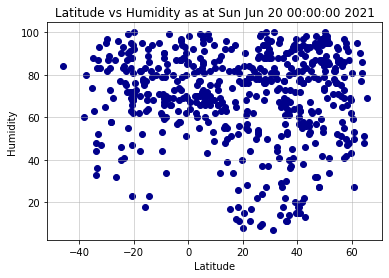

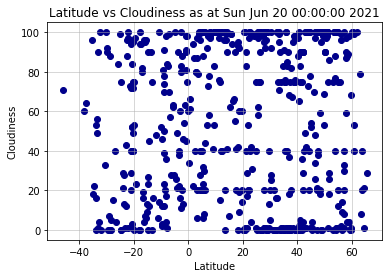

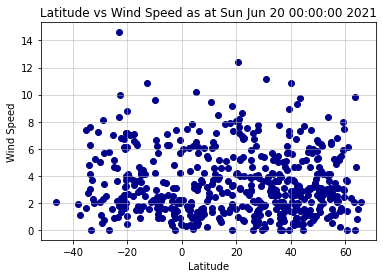

In [10]:
scatter_types = ["Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
for scatter_type in scatter_types:
    do_scatter_plot(df_weather["Latitude"],
                    df_weather[scatter_type],
                    "Latitude",
                    scatter_type,
                    "darkblue",
                    "Latitude_vs_"+scatter_type+".png",
                    latest_date)

# Description of the scatter plot 

### *Latitude vs Max temperature*

Temperatures in northern hemisphere are generally higher, as it is the northern summer, with the highest temperatures being from the quator up to around Latitude 30. The highest temperatures are in desert regions indicated by the outliers.

### *Latitude vs Humidity*
Humidity is fairly even across the globe reflecting both warmer and colder areas having reasonable humidity. Some outliers, which appear to be in regions where desert is more prevalent.
 
### *Latitude vs Cloudiness*
This doesn't seem to show any clear patterns as the cloud coverage is spread over all areas and all ranges (0-100).


### *Latitude vs Wind Speed*
This doesn't seem to show any clear patterns as the wind speed range does not seem to vary considerably by latitude.




In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = df_weather.loc[df_weather["Latitude"] >= 0]
southern_hemisphere = df_weather.loc[df_weather["Latitude"] < 0]

#routine to run a linear regression
def do_linear_regression_plot(x_axis, y_axis, x_title, y_title, plot_color, save_name, rep_date):
    print(f"{x_title} vs {y_title} r-squared is : {round(st.pearsonr(x_axis, y_axis)[0], 2)}")

    plt.clf()
    plot_title = x_title + " vs " + y_title + " as at " + rep_date
    plt.title(plot_title)
    plt.xlabel(x_title)

    (slope, intercept, r_value, p_value, stderr) = linregress(x_axis, y_axis)
    reg_line = x_axis * slope + intercept

    line_annotate = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.ylabel(y_title + "/ " + line_annotate)
    plt.scatter(x_axis, y_axis, color=plot_color)
    plt.plot(x_axis, reg_line, "red")
    plt.savefig(save_name)
    plt.show()

Northern Latitude vs Max Temp r-squared is : -0.63


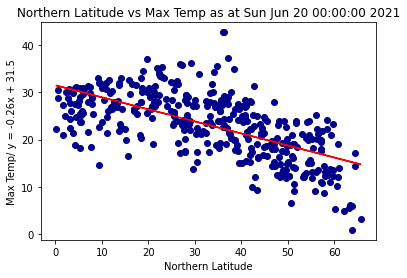

Northern Latitude vs Humidity r-squared is : 0.02


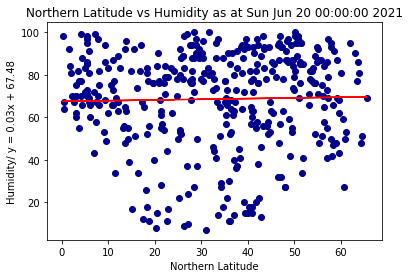

Northern Latitude vs Cloudiness r-squared is : -0.09


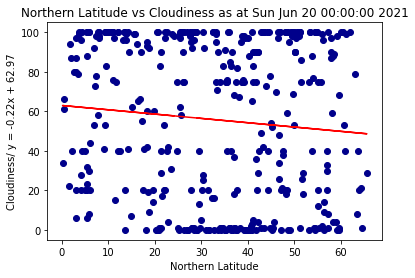

Northern Latitude vs Wind Speed r-squared is : -0.04


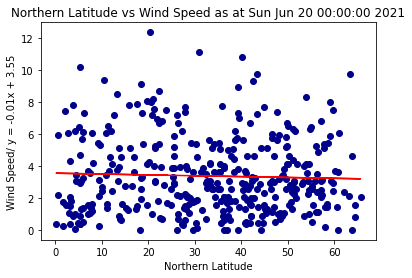

Southern Latitude vs Max Temp r-squared is : 0.59


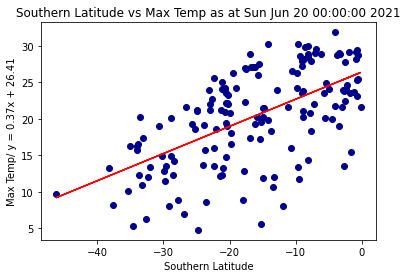

Southern Latitude vs Humidity r-squared is : 0.1


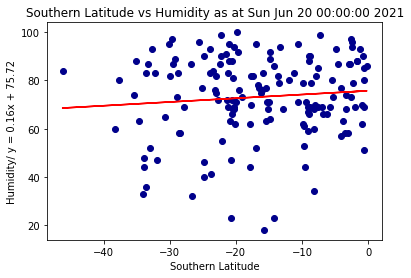

Southern Latitude vs Cloudiness r-squared is : 0.11


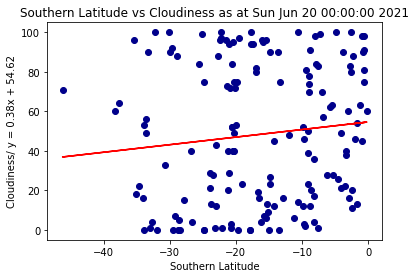

Southern Latitude vs Wind Speed r-squared is : -0.15


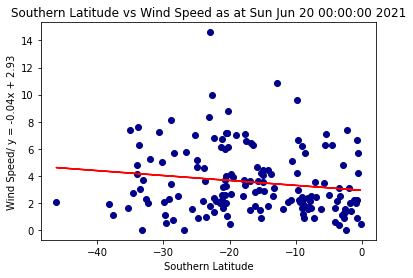

In [14]:
# Plot all the linear regression data
# Northern
for scatter_type in scatter_types:
    do_linear_regression_plot(northern_hemisphere["Latitude"],
                              northern_hemisphere[scatter_type],
                              "Northern Latitude",
                              scatter_type,
                              "darkblue",
                              "Northern_Latitude_vs_"+scatter_type+"Reg.png",
                              latest_date)
#Southern    
for scatter_type in scatter_types:
    do_linear_regression_plot(southern_hemisphere["Latitude"],
                              southern_hemisphere[scatter_type],
                              "Southern Latitude",
                              scatter_type,
                              "darkblue",
                              "Southern_Latitude_vs_"+scatter_type+"Reg.png",
                              latest_date)
    

# Observations Linear Regression 


### *Northern Latitude vs Temperature*

Clearly the further north, the higher the temperature, as expected with areas closer to the equator being hotter. Some outliers in desert or inland areas due to northern summer.

### *Northern Others* 
Not much of a correlation between the latitude and the wind speed, cloud or humidity as the line is relatively flat.

### *Southern Latitude vs Temperature*
Line indicates trend that the closer to the equator, then the warmer the location, which is reasonable as the south is in winter.

### *Southern Others*
Not much of a correlation between the latitude and the wind speed, cloud or humidity as the line is relatively flat.

